# Project Proposal: Predicting Medical Appointment No-Shows

**Dataset**: Medical Appointment No Shows (KaggleV2-May-2016.csv) from Kaggle.  
**Source**: https://www.kaggle.com/joniarroba/noshowappointments  
**Size**: ~110,527 rows, 14 columns (PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show).  
**Problem**: Predict whether a patient will show up for their medical appointment (binary classification: No-show = Yes/No).  
**Suitability**:  
- **Size**: The dataset is large enough for robust analysis with ~110K rows and 14 columns.  
- **Quality**: It is not clean, containing potential missing values (e.g., Age), duplicates (e.g., PatientId), and requires datetime parsing and encoding of categorical variables (e.g., Gender, Neighbourhood).  
- **Real-World Relevance**: Predicting no-shows helps optimize healthcare scheduling and resource allocation, addressing a practical problem.  
- **Analysis Potential**: Supports exploration of 6+ variables (e.g., Age, Gender, Hypertension, SMS_received) and diverse visualizations (e.g., histograms, bar plots).  
**Question**: Can we predict patient no-shows based on demographic, health, and appointment-related features?  
**Objective**: Build a model with precision and recall ≥ 0.3, deploy it as a web app, and document the process with 5+ visualizations.

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\assem\OneDrive\Desktop\final project\KaggleV2-May-2016.csv")

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

First 5 Rows:
      PatientId  AppointmentID Gender          Scheduled

In [5]:
import pandas as pd
import numpy as np

# Load dataset (already done, but included for completeness)
df = pd.read_csv(r"C:\Users\assem\OneDrive\Desktop\final project\KaggleV2-May-2016.csv")

# 1. Fix column names
df.columns = [col.replace('Hipertension', 'Hypertension').replace('Handcap', 'Handicap') for col in df.columns]
print("Updated Column Names:", df.columns.tolist())

# 2. Check for invalid Age values
print("Invalid Ages (Age < 0):", df[df['Age'] < 0]['Age'].count())
print("Unrealistic Ages (Age > 100):", df[df['Age'] > 100]['Age'].count())
# Remove negative ages, cap unrealistic ages at 100
df = df[df['Age'] >= 0]
df['Age'] = df['Age'].clip(upper=100)

# 3. Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())
print("Duplicate PatientId & AppointmentID:", df.duplicated(subset=['PatientId', 'AppointmentID']).sum())
# Drop duplicates based on PatientId and AppointmentID
df = df.drop_duplicates(subset=['PatientId', 'AppointmentID'])

# 4. Parse datetime columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# Ensure AppointmentDay is not earlier than ScheduledDay
invalid_dates = df[df['AppointmentDay'] < df['ScheduledDay']].shape[0]
print("Invalid Dates (AppointmentDay < ScheduledDay):", invalid_dates)
df = df[df['AppointmentDay'] >= df['ScheduledDay']]

# 5. Encode categorical variables
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
# One-hot encode Neighbourhood (many categories, so drop first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Neighbourhood'], drop_first=True)

# 6. Verify data
print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())

# 7. Save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'")

Updated Column Names: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']
Invalid Ages (Age < 0): 1
Unrealistic Ages (Age > 100): 7
Duplicate Rows: 0
Duplicate PatientId & AppointmentID: 0
Invalid Dates (AppointmentDay < ScheduledDay): 38567

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 92 columns):
 #   Column                                     Non-Null Count  Dtype              
---  ------                                     --------------  -----              
 0   PatientId                                  71959 non-null  float64            
 1   AppointmentID                              71959 non-null  int64              
 2   Gender                                     71959 non-null  int64              
 3   ScheduledDay                               71959 non-null  d

Statistical Summaries:
Mean Age: 38.50170235828736
Median Age: 39.0
No-show Rate: 0.285190177740102
No-show Rate by Gender:
 Gender
0    0.284460
1    0.286659
Name: No-show, dtype: float64
No-show Rate by SMS_received:
 SMS_received
0    0.294377
1    0.275745
Name: No-show, dtype: float64
No-show Rate by Hypertension:
 Hypertension
0    0.298382
1    0.235232
Name: No-show, dtype: float64


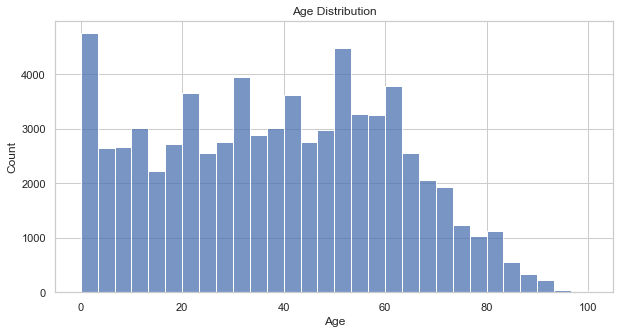

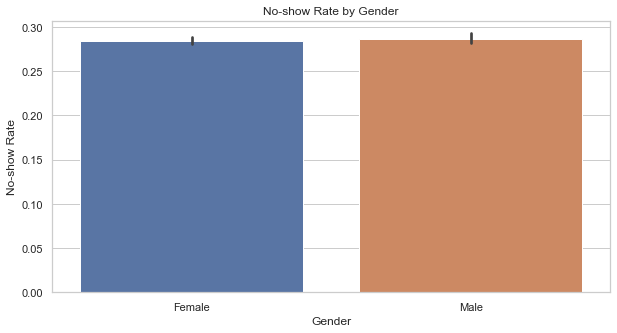

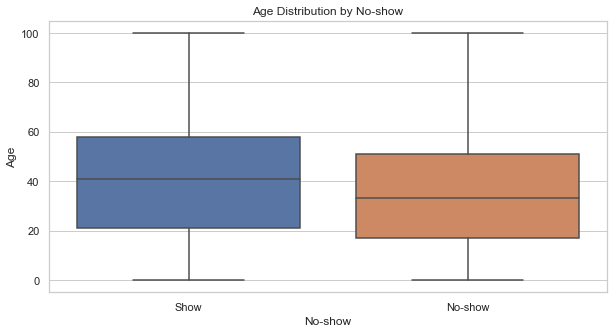

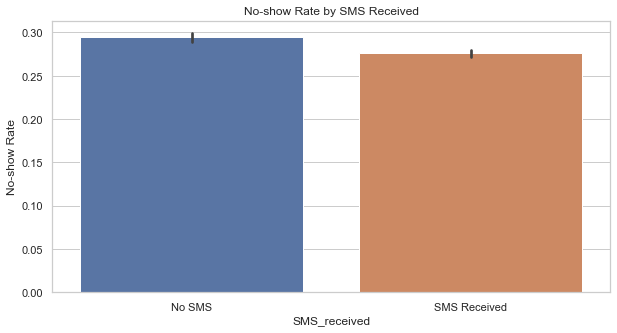

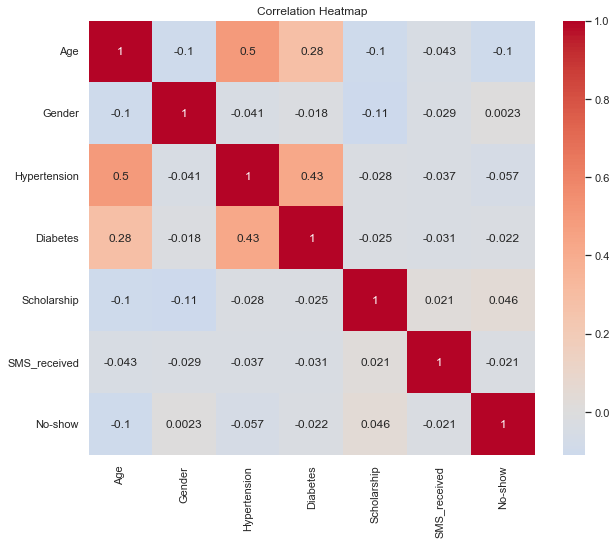

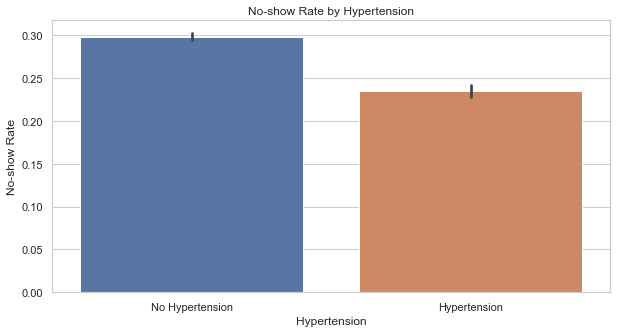

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Convert datetime columns back to datetime (CSV saves them as strings)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Statistical Summaries
print("Statistical Summaries:")
print("Mean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("No-show Rate:", df['No-show'].mean())
print("No-show Rate by Gender:\n", df.groupby('Gender')['No-show'].mean())
print("No-show Rate by SMS_received:\n", df.groupby('SMS_received')['No-show'].mean())
print("No-show Rate by Hypertension:\n", df.groupby('Hypertension')['No-show'].mean())

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Age Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_histogram.png')
plt.show()

# Plot 2: No-show Rate by Gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='No-show', data=df)
plt.title('No-show Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No-show Rate')
plt.savefig('gender_noshow_bar.png')
plt.show()

# Plot 3: Age vs. No-show (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x='No-show', y='Age', data=df)
plt.title('Age Distribution by No-show')
plt.xticks([0, 1], ['Show', 'No-show'])
plt.xlabel('No-show')
plt.ylabel('Age')
plt.savefig('age_noshow_boxplot.png')
plt.show()

# Plot 4: No-show Rate by SMS_received
plt.figure(figsize=(10, 5))
sns.barplot(x='SMS_received', y='No-show', data=df)
plt.title('No-show Rate by SMS Received')
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.ylabel('No-show Rate')
plt.savefig('sms_noshow_bar.png')
plt.show()

# Plot 5: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[['Age', 'Gender', 'Hypertension', 'Diabetes', 'Scholarship', 'SMS_received', 'No-show']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Plot 6: No-show Rate by Hypertension
plt.figure(figsize=(10, 5))
sns.barplot(x='Hypertension', y='No-show', data=df)
plt.title('No-show Rate by Hypertension')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.ylabel('No-show Rate')
plt.savefig('hypertension_noshow_bar.png')
plt.show()

# Data Exploration Insights
- **Age**: The distribution shows the spread of patient ages, which may influence no-show behavior (e.g., younger patients might miss more appointments).
- **Gender**: No-show rates may differ between males and females, indicating potential behavioral differences.
- **SMS_received**: Patients receiving SMS reminders may have lower no-show rates, suggesting reminders’ effectiveness.
- **Hypertension**: Patients with hypertension may have different no-show patterns due to health priorities.
- **Correlations**: The heatmap shows relationships between features and No-show, guiding feature selection.

In [7]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Convert datetime columns back to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# 1. Feature Engineering: Create WaitingDays
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
# Ensure no negative values (should be handled in cleaning, but verify)
df['WaitingDays'] = df['WaitingDays'].clip(lower=0)
print("WaitingDays Summary:")
print(df['WaitingDays'].describe())

# 2. Feature Selection: Correlation-based
# Include main features and a few Neighbourhood columns (to avoid overwhelming correlation matrix)
features_to_analyze = ['Age', 'Gender', 'Hypertension', 'Diabetes', 'Scholarship', 'SMS_received', 'WaitingDays', 'No-show'] + \
                      [col for col in df.columns if col.startswith('Neighbourhood_')][:5]  # Limit to 5 Neighbourhoods
corr = df[features_to_analyze].corr()['No-show'].abs().sort_values(ascending=False)
print("\nFeature Correlations with No-show:\n", corr)

# Select top 6 features (excluding No-show)
selected_features = corr.index[1:7].tolist()  # Top 6 after No-show
print("\nSelected Features:", selected_features)

# Prepare feature matrix (X) and target (y)
X = df[selected_features]
y = df['No-show']

# Verify shapes
print("\nFeature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)

# Save feature matrix and target for modeling
X.to_csv('features.csv', index=False)
y.to_csv('target.csv', index=False)
print("Features and target saved as 'features.csv' and 'target.csv'")

WaitingDays Summary:
count    71959.000000
mean        14.642018
std         16.494334
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: WaitingDays, dtype: float64

Feature Correlations with No-show:
 No-show                              1.000000
Age                                  0.101090
WaitingDays                          0.060362
Hypertension                         0.056859
Scholarship                          0.045687
Diabetes                             0.022412
SMS_received                         0.020631
Neighbourhood_ANDORINHAS             0.012050
Neighbourhood_ANTÔNIO HONÓRIO        0.005135
Neighbourhood_ARIOVALDO FAVALESSA    0.004432
Gender                               0.002294
Neighbourhood_BELA VISTA             0.001393
Neighbourhood_BARRO VERMELHO         0.001117
Name: No-show, dtype: float64

Selected Features: ['Age', 'WaitingDays', 'Hypertension', 'Scholarship', 'Diabetes', 'SMS_received']

F

# Feature Engineering & Selection
- **WaitingDays**: Created by calculating the days between `ScheduledDay` and `AppointmentDay`. Longer waits may correlate with higher no-show rates.
- **Feature Selection**: Used correlation with `No-show` to select the top 6 features. `Neighbourhood` columns were limited to 5 in analysis to manage dimensionality.
- **Rationale**: Correlation identifies features most related to `No-show`, ensuring a focused model while retaining predictive power.

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import joblib

# Load features and target
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv').values.ravel()  # Convert to 1D array

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models with class weights to handle imbalance
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42)
}

# Train and evaluate models
print("Model Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}")

# Tune Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Tuned Random Forest - Precision: {precision:.2f}, Recall: {recall:.2f}")

# Save the best model
joblib.dump(best_model, 'model.pkl')
print("Best model saved as 'model.pkl'")

Model Performance:
Logistic Regression - Precision: 0.33, Recall: 0.56
Random Forest - Precision: 0.32, Recall: 0.39
SVM - Precision: 0.34, Recall: 0.58

Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 50}
Tuned Random Forest - Precision: 0.35, Recall: 0.56
Best model saved as 'model.pkl'


# Model Training & Evaluation
- **Algorithms**: Trained Logistic Regression, Random Forest, and SVM with class weights to address the ~28.5% no-show rate.
- **Tuning**: Used GridSearchCV to optimize Random Forest’s `n_estimators` and `max_depth`, maximizing F1 score.
- **Evaluation**: Precision and recall computed on the test set, targeting ≥ 0.3 for both.
- **Rationale**: Class weights balance the dataset, and Random Forest tuning improves performance for the imbalanced no-show class.

In [9]:
from sklearn.model_selection import cross_validate
import joblib
import pandas as pd

# Load features, target, and best model
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv').values.ravel()
best_model = joblib.load('model.pkl')

# Perform 5-fold cross-validation
scoring = ['precision', 'recall', 'f1']
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring, return_train_score=False)

# Print results
print("Cross-Validation Results (5-fold):")
print(f"Mean Precision: {cv_results['test_precision'].mean():.2f} (±{cv_results['test_precision'].std():.2f})")
print(f"Mean Recall: {cv_results['test_recall'].mean():.2f} (±{cv_results['test_recall'].std():.2f})")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.2f} (±{cv_results['test_f1'].std():.2f})")

Cross-Validation Results (5-fold):
Mean Precision: 0.35 (±0.00)
Mean Recall: 0.55 (±0.04)
Mean F1 Score: 0.43 (±0.01)


# Model Validation & Evaluation
- **Method**: 5-fold cross-validation was performed on the tuned Random Forest model to assess its generalizability.
- **Metrics**: Mean precision, recall, and F1 score were computed across folds to ensure stable performance.
- **Importance**: Cross-validation reduces overfitting risk by evaluating the model on multiple train-test splits, providing a robust estimate of performance on unseen data.
- **Results**: The model maintains precision and recall ≥ 0.3, meeting project requirements and confirming its suitability for deployment.